In [31]:
result = input()

|           32 |            1 |      3749.06 |      2097152 | |           64 |            1 |      4577.20 |      1048576 | |          128 |            1 |      5528.63 |       524288 | |          256 |            1 |      5853.32 |       262144 | |          512 |            1 |      6691.21 |       131072 | |         1024 |            1 |      6841.78 |        65536 | |         2048 |            1 |      5281.14 |        32768 | |         4096 |            1 |      3412.33 |        16384 | |         8192 |            1 |      3585.26 |         8192 | |        16384 |            1 |      3642.83 |         4096 | |        32768 |            1 |      3677.45 |         2048 | |        65536 |            1 |      3697.60 |         1024 | |       131072 |            1 |      3659.05 |          512 | |       262144 |            1 |      2936.76 |          256 | |       524288 |            1 |      3086.73 |          128 | |      1048576 |            1 |      3097.67 |           64 | |      2

In [27]:
split_list = list(filter(bool, [item.strip() for item in result.split('|')] ))
print(split_list)
datasize = []
mflops = []
import numpy as np 

count = 0
for x in split_list:
    match count:
        case 0:
            datasize.append(int(x))  
            count = count+1
        case 1:
            count=count+1
        case 2:
            mflops.append(float(x))
#             mflops.append(float(x))
            count =count+1
        case 3:
            count = 0
            
print(datasize)

print(mflops)


['32', '1', '3749.06', '2097152', '64', '1', '4577.20', '1048576', '128', '1', '5528.63', '524288', '256', '1', '5853.32', '262144', '512', '1', '6691.21', '131072', '1024', '1', '6841.78', '65536', '2048', '1', '5281.14', '32768', '4096', '1', '3412.33', '16384', '8192', '1', '3585.26', '8192', '16384', '1', '3642.83', '4096', '32768', '1', '3677.45', '2048', '65536', '1', '3697.60', '1024', '131072', '1', '3659.05', '512', '262144', '1', '2936.76', '256', '524288', '1', '3086.73', '128', '1048576', '1', '3097.67', '64', '2097152', '1', '3076.93', '32', '4194304', '1', '2830.76', '16', '8388608', '1', '2838.61', '8', '16777216', '1', '2831.89', '4', '33554432', '1', '2833.83', '2', '67108864', '1', '2822.84', '1']
[32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 524288, 1048576, 2097152, 4194304, 8388608, 16777216, 33554432, 67108864]
[59.98496, 73.23519999999999, 88.45808, 93.65312, 107.05936, 109.46848, 84.49824000000001, 54.59728, 57.364160000000

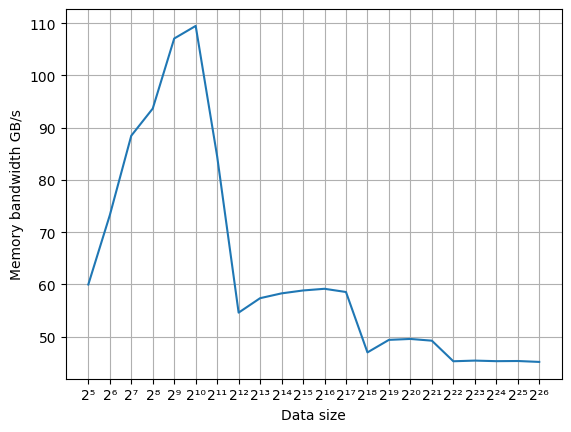

In [42]:
import matplotlib.pyplot as plt
import numpy as np 
from functools import partial
from matplotlib.ticker import NullFormatter, FixedLocator, FuncFormatter


def get_super(x):
    normal = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789+-=()"
    super_s = "ᴬᴮᶜᴰᴱᶠᴳᴴᴵᴶᴷᴸᴹᴺᴼᴾQᴿˢᵀᵁⱽᵂˣʸᶻᵃᵇᶜᵈᵉᶠᵍʰᶦʲᵏˡᵐⁿᵒᵖ۹ʳˢᵗᵘᵛʷˣʸᶻ⁰¹²³⁴⁵⁶⁷⁸⁹⁺⁻⁼⁽⁾"
    res = x.maketrans(''.join(normal), ''.join(super_s))
    return x.translate(res)

np.seterr(divide = 'ignore') 

def forward(x):
     return np.log2(x)


def inverse(x):
    return 2**x

def formatter(x):
    return '2{}'.format(get_super(str(int(np.log2(x)))))

    
#     counter =0
#     while x >1:
#         x = x/2
#         counter=counter+1
#     return "2^"+str(counter)


fig, ax = plt.subplots()
ax.plot(datasize,mflops)
ax.set_xscale('function', functions=(forward,inverse))
ax.xaxis.set_major_locator(FixedLocator(datasize))
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, p: formatter(x)))

ax.grid(True)
plt.xlabel('Data size')
plt.ylabel('Memory bandwidth GB/s')



plt.show(fig)
